In [170]:
import matplotlib.pyplot as plt
import pandas as pd

In [171]:
df = pd.read_csv("catalog.csv", encoding="latin1", on_bad_lines="skip")

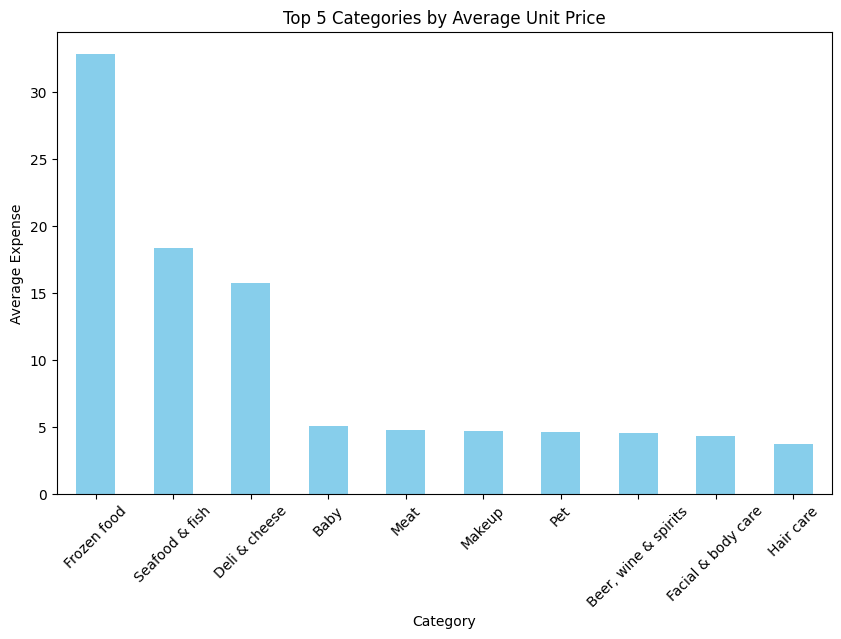

In [172]:
category_prices = df.groupby("category")["unit_price"].mean()
top_categories = category_prices.nlargest(10)

plt.figure(figsize=(10, 6))
top_categories.plot(kind="bar", color="skyblue")
plt.title("Top 5 Categories by Average Unit Price")
plt.xlabel("Category")
plt.ylabel("Average Expense")
plt.xticks(rotation=45)
plt.show()

In [173]:
categories_to_filter = ["Frozen food", "Deli & cheese", "Seafood & fish"]
category_products = df[df["category"].isin(categories_to_filter)]
category_products.sort_values("unit_price", ascending=False).head(5)

,id,ean,name,legal_name,unit_price,is_discounted,previous_price,origin,supplier,weight,category,age_check,alcohol_by_volume,is_new,is_pack,pack_size
4798,24706.0,8480000247063,Frozen medium striped red shrimp,NaN,2965.05,False,NaN,NaN,NaN,NaN,Frozen food,False,NaN,False,False,NaN
4975,24487.0,8480000244871,Frozen small crab claws,NaN,1960.20,False,NaN,NaN,NaN,NaN,Frozen food,False,NaN,False,False,NaN
1889,24701.0,8480000247018,Frozen shrimp for rice Hacendado,NaN,1480.05,False,NaN,NaN,NaN,NaN,Frozen food,False,NaN,False,False,NaN
4796,24708.0,8480000247087,Frozen small striped red shrimp,NaN,1435.50,False,NaN,NaN,NaN,NaN,Frozen food,False,NaN,False,False,NaN
3914,83490.0,8480000834904,Cooked King Prawn,Langostino entero cocido. Refrigerado,1084.05,False,NaN,NaN,Pescanova Espaï¿½a S.L.U,NaN,Seafood & fish,False,NaN,False,False,NaN


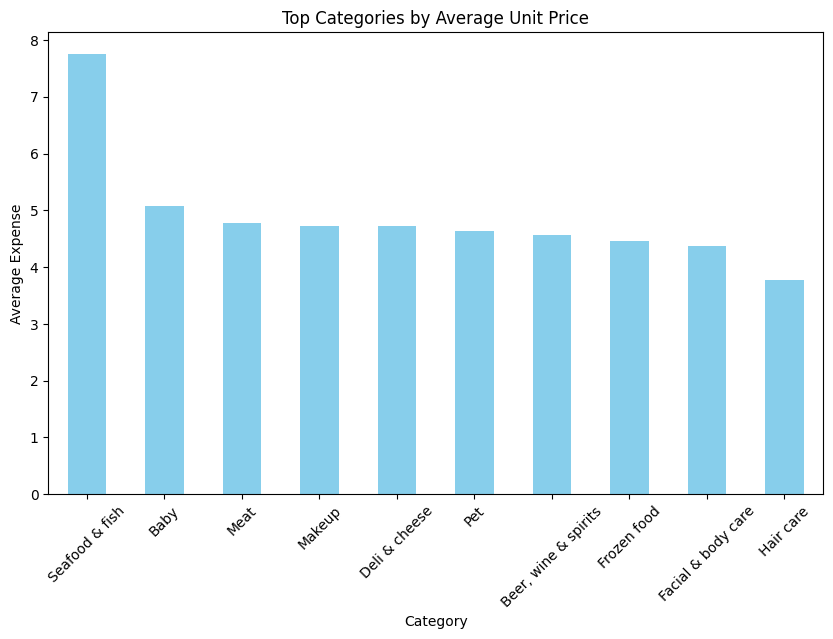

In [174]:
category_prices = df[df["unit_price"] < 75].groupby("category")["unit_price"].mean()
top_categories = category_prices.nlargest(10)

plt.figure(figsize=(10, 6))
top_categories.plot(kind="bar", color="skyblue")
plt.title("Top Categories by Average Unit Price")
plt.xlabel("Category")
plt.ylabel("Average Expense")
plt.xticks(rotation=45)
plt.show()

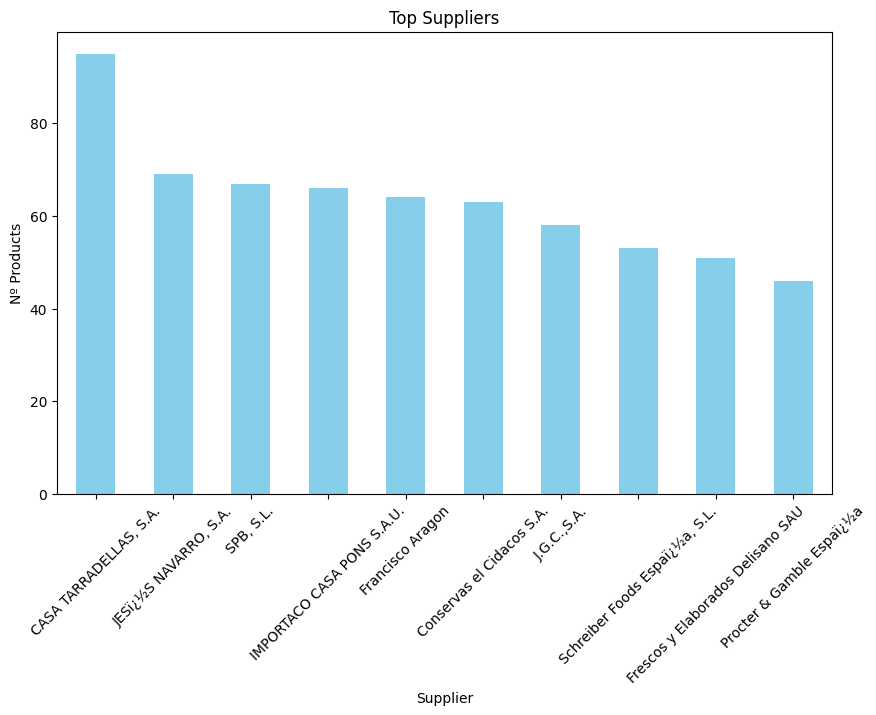

In [175]:
supplier_counts = df["supplier"].value_counts()

supplier_counts_df = supplier_counts.reset_index()
supplier_counts_df.columns = ["supplier", "count"]
top_suppliers = supplier_counts.nlargest(10)

plt.figure(figsize=(10, 6))
top_suppliers.plot(kind="bar", color="skyblue")
plt.title("Top Suppliers")
plt.xlabel("Supplier")
plt.ylabel("Nº Products")
plt.xticks(rotation=45)
plt.show()

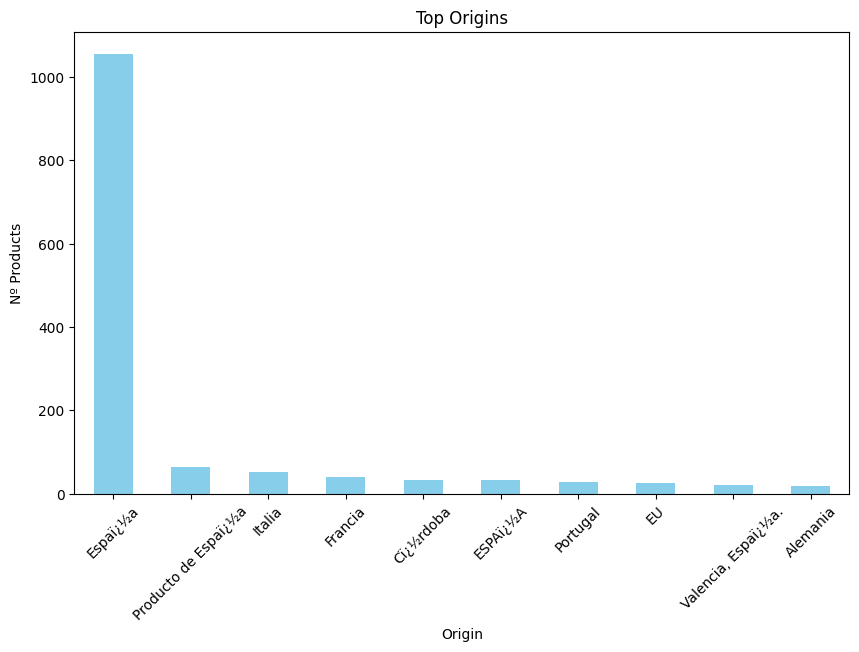

In [176]:
supplier_counts = df["origin"].value_counts()

supplier_counts_df = supplier_counts.reset_index()
supplier_counts_df.columns = ["origin", "count"]
top_suppliers = supplier_counts.nlargest(10)

plt.figure(figsize=(10, 6))
top_suppliers.plot(kind="bar", color="skyblue")
plt.title("Top Origins")
plt.xlabel("Origin")
plt.ylabel("Nº Products")
plt.xticks(rotation=45)
plt.show()

C:\Users\Joel Taylor\AppData\Local\Temp\ipykernel_4092\1340019370.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alcoholic_drinks["alcohol_content_per_liter"] = (alcoholic_drinks["alcohol_by_volume"] / 100) * df["weight"]
C:\Users\Joel Taylor\AppData\Local\Temp\ipykernel_4092\1340019370.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alcoholic_drinks["alcohol_per_euro"] = alcoholic_drinks["alcohol_content_per_liter"] / alcoholic_drinks["unit_price"]


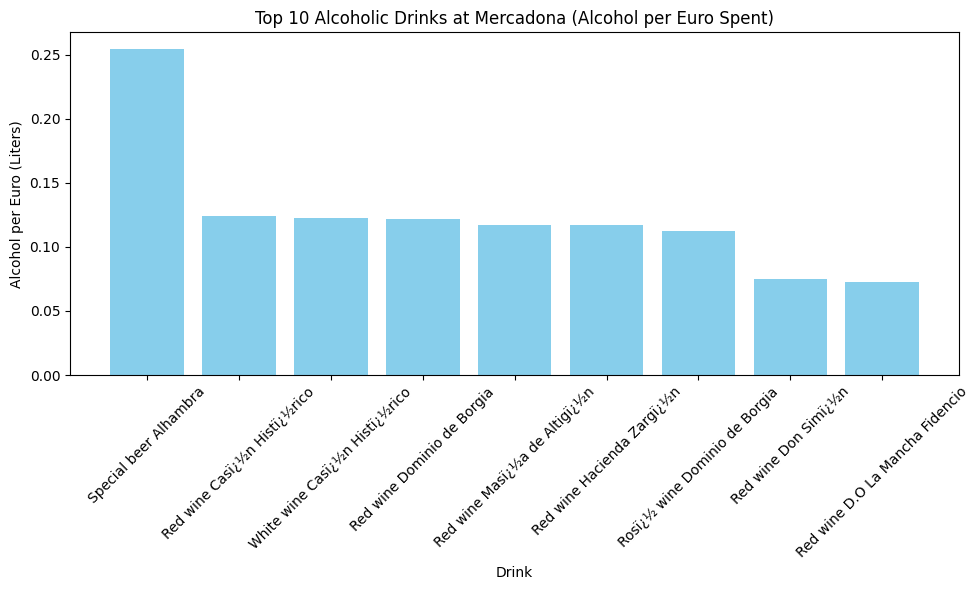

In [182]:
# Selecting rows where "age_check" column is True
alcoholic_drinks = df[df["age_check"]]

# Convert alcohol percentage to decimal and calculate alcohol content per liter
alcoholic_drinks["alcohol_content_per_liter"] = (alcoholic_drinks["alcohol_by_volume"] / 100) * df["weight"]

# Calculate alcohol per euro spent
alcoholic_drinks["alcohol_per_euro"] = alcoholic_drinks["alcohol_content_per_liter"] / alcoholic_drinks["unit_price"]

# Sort drinks by alcohol per euro ratio
alcoholic_drinks = (
    alcoholic_drinks.sort_values(by="alcohol_per_euro", ascending=False)
    .reset_index(drop=True)
    .nlargest(10, "alcohol_per_euro")
)

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(alcoholic_drinks["name"], alcoholic_drinks["alcohol_per_euro"], color="skyblue")
plt.title("Top 10 Alcoholic Drinks at Mercadona (Alcohol per Euro Spent)")
plt.xlabel("Drink")
plt.ylabel("Alcohol per Euro (Liters)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()